**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   Estudiante 1: Erik Morales Hinojosa
*   MATRÍCULA del estudiante 1: A01795110
*   Estudiante 2: Alejandra Berenice Vega López
*   MATRÍCULA de la estudiante 2: A01795415
*   Estudiante 3: Israel Luján González
*   MATRÍCULA del estudiante 3: A01794693
*   Estudiante 4: Eduardo Selim Martínez Mayorga
*   MATRÍCULA del estudiante 4: A01795167

In [1]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [2]:
"""
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
os.chdir(DIR)
"""

'\nimport os\nDIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"\nos.chdir(DIR)\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

import math

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [4]:
# El archivo "data.csv" se encuentra en la misma
# carpeta que este Jupyter Notebook
data_df = pd.read_csv('data.csv')

# Se verifica la lectura y definición del dataframe
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de: 

In [6]:
data_df.set_index('id', inplace=True)

In [7]:
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678




1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [8]:
data_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data_df.describe(include = 'object')

,diagnosis
count,569
unique,2
top,B
freq,357


1b) Valores únicos por variable para identificar posibles variables categóricas. 

In [10]:
data_df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

1c) Búsqueda de valores faltantes.

In [11]:
# Se obtiene el número de NaNs
data_df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno) 

In [12]:
data_df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

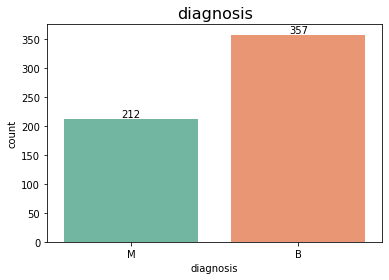

In [13]:
# Se construye la gráfica de barras para "disgnosis"
ax = sns.countplot(x="diagnosis", data=data_df, palette='Set2')
ax.set_title(f'diagnosis', fontdict={'size': 16})
for container in ax.containers:
    ax.bar_label(container)

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto. 

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.
 
Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe. 

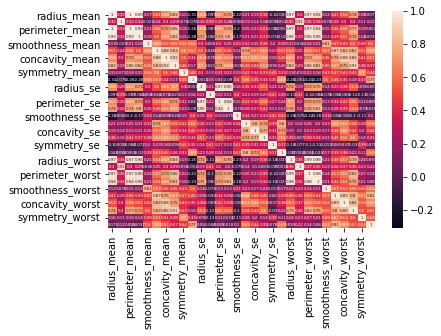

In [14]:
# Se construye el mapa de calor a partir de las correlaciones
# Pero se le agregan las leyendas de las correlaciones
# para mejor visualización
sns.heatmap(data_df.corr(),
            annot=True, annot_kws={"fontsize":4});

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad. 

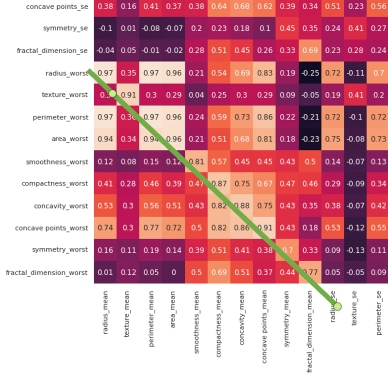

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias". 
 
Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.
 
Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [15]:
indices_worst = data_df.columns.str.contains('worst', case=False)

# Variables a eliminar
vars_eliminar_worst = data_df.columns[indices_worst].tolist()

vars_eliminar_worst

['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [16]:
# Eliminamos las columnas solicitadas
data_df = data_df.drop(vars_eliminar_worst, axis=1)

In [17]:
# Reobtenemos el número de renglones y columnas del dataframe
data_df.shape

(569, 21)

In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-nul

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]) 
```




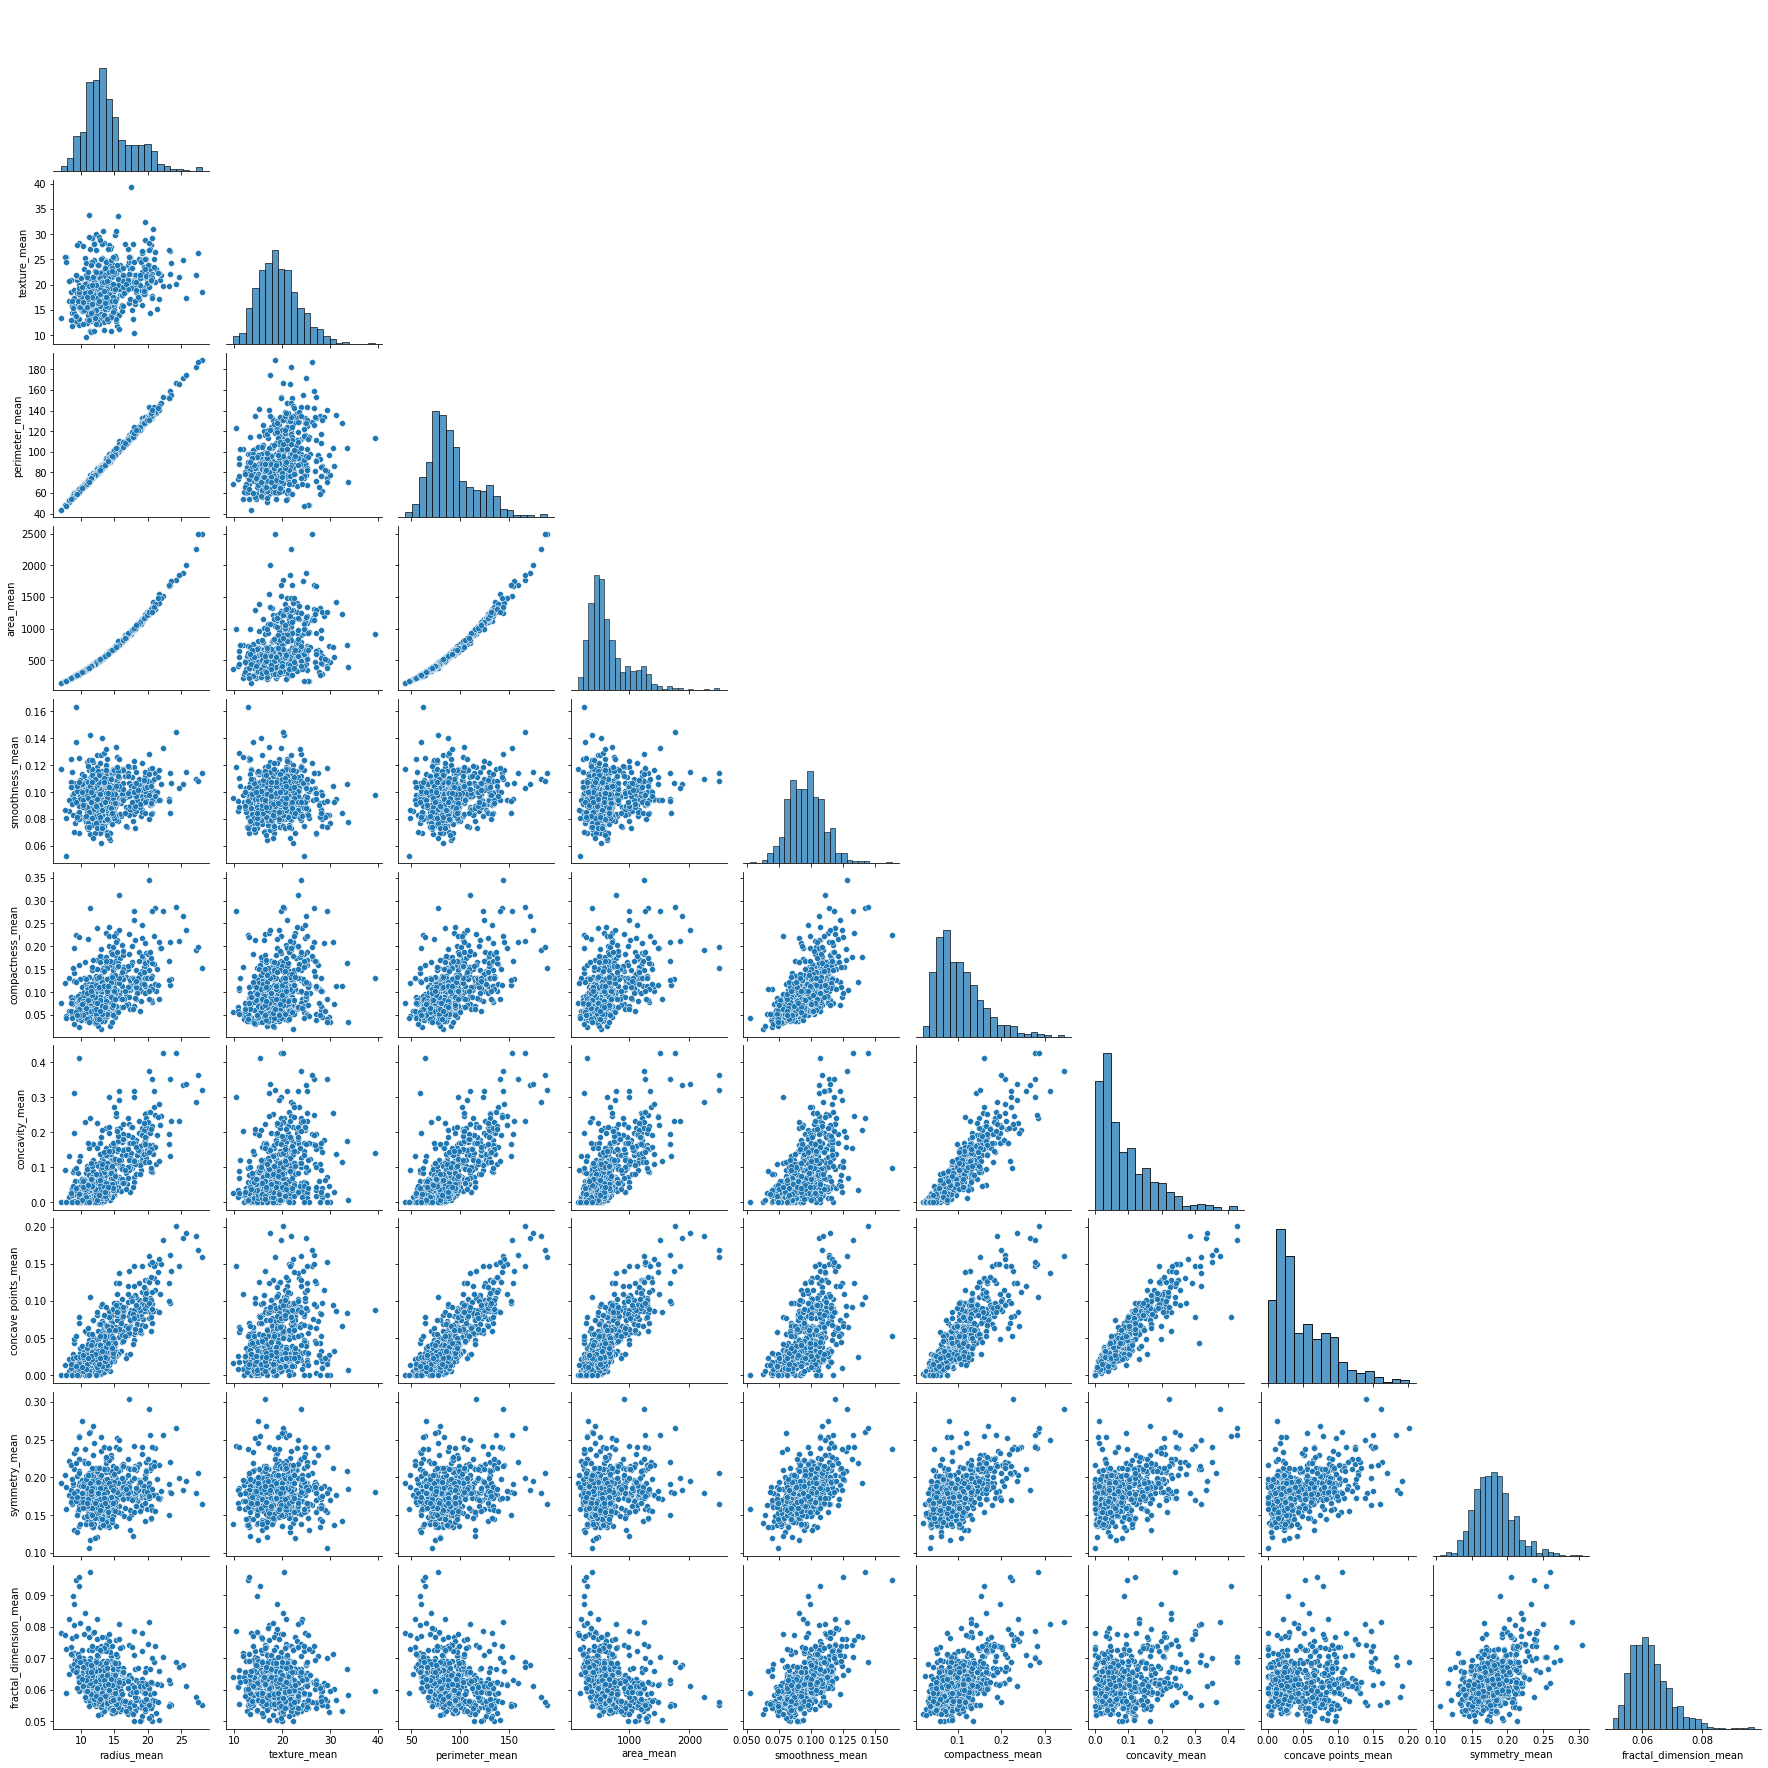

In [19]:
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']], corner = True) 

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`
 
Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros. 

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


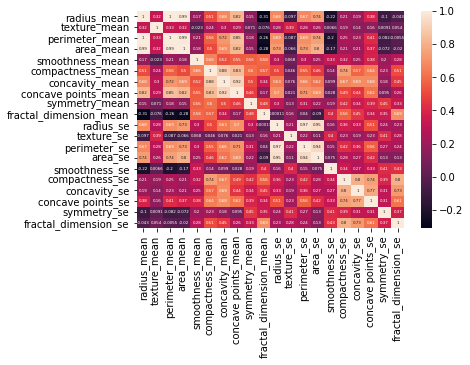

In [20]:
# Se construye el mapa de calor a partir de las correlaciones
# Pero se le agregan las leyendas de las correlaciones
# para mejor visualización
sns.heatmap(data_df.corr(),
            annot=True, annot_kws={"fontsize":4});

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`. 

In [21]:
indices_a_remover = []
for col in ['perimeter', 'area', 'concavity', 'concave']:
    print(col)
    indices = data_df.columns.str.contains(col, case=False).tolist()
    indices = np.nonzero(indices)[0].tolist()
    indices_a_remover = indices_a_remover + indices
    print(indices)

perimeter
[3, 13]
area
[4, 14]
concavity
[7, 17]
concave
[8, 18]


In [22]:
# Variables a eliminar
vars_eliminar_altaCorr = data_df.columns[indices_a_remover].tolist()
vars_eliminar_altaCorr

['perimeter_mean',
 'perimeter_se',
 'area_mean',
 'area_se',
 'concavity_mean',
 'concavity_se',
 'concave points_mean',
 'concave points_se']

In [23]:
# Eliminamos las columnas solicitadas
data_df = data_df.drop(vars_eliminar_altaCorr, axis=1)

In [24]:
# Reobtenemos el número de renglones y columnas del dataframe
data_df.shape

(569, 13)

In [25]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 78.4+ KB


Observa la distribución de las variables resultantes (deben ser 12): 

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

In [26]:
columnas = data_df.columns.tolist()
columnas.remove("diagnosis")
columnas

['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se']

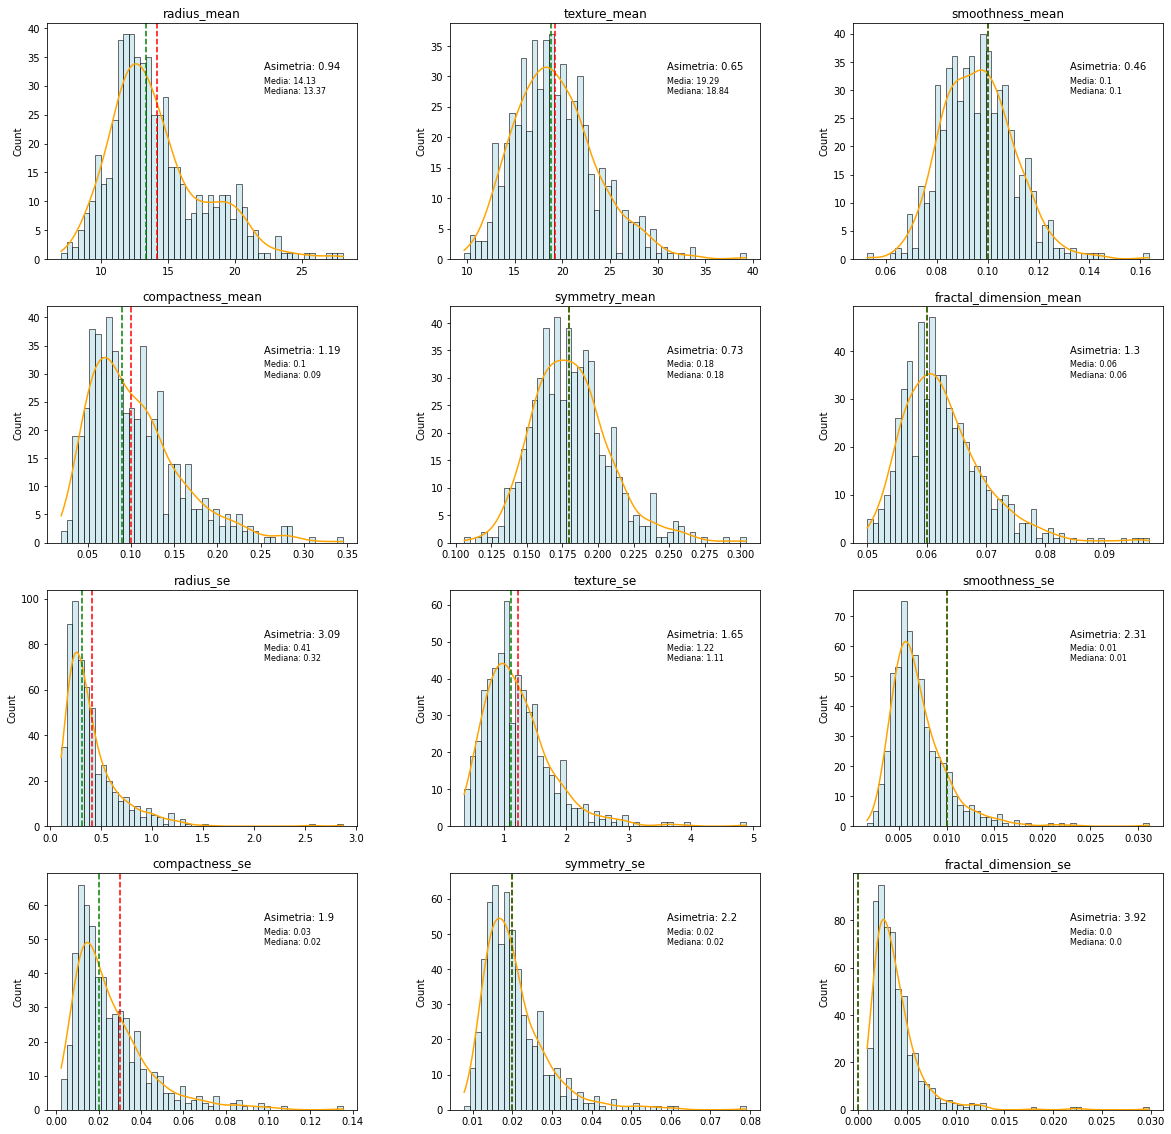

In [27]:
df = data_df
cols_de_interes = columnas

fig, axes = plt.subplots(4,3, figsize=(20,20))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(df[cols_de_interes], axes):
  sns.histplot(x=df[col], ax=ax, bins=50, kde=True,
               color="lightblue")
  ax.set(title=f'{col}', xlabel=None)
  ax.lines[0].set_color('orange')
  mean = round(df[col].mean(),2)
  ax.axvline(mean, color='red', linestyle='dashed', label="Media")
  median = round(df[col].median(),2)
  ax.axvline(median, color='green', linestyle='dashed', label="Mediana")
  ax.annotate('Media: {} \nMediana: {}'.format(mean, median),
              xy=(0.70, 0.70), xycoords='axes fraction',
              fontsize=8, ha='left')
  asim = round(df[col].skew(),2)
  ax.annotate('Asimetria: {}'.format(asim), xy=(0.70, 0.80), 
              xycoords='axes fraction', fontsize=10, ha='left')

In [28]:
# Se obtiene el coeficiente de asimetría de las variables numéricas
data_df.skew(axis=0)

radius_mean               0.942380
texture_mean              0.650450
smoothness_mean           0.456324
compactness_mean          1.190123
symmetry_mean             0.725609
fractal_dimension_mean    1.304489
radius_se                 3.088612
texture_se                1.646444
smoothness_se             2.314450
compactness_se            1.902221
symmetry_se               2.195133
fractal_dimension_se      3.923969
dtype: float64

In [29]:
# Se obtienen las que tiene skewness mayor que 1
condicion_skew = data_df.skew(axis=0) > 1
skew_cols = condicion_skew[condicion_skew].index.tolist()
skew_cols

['compactness_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se']

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]

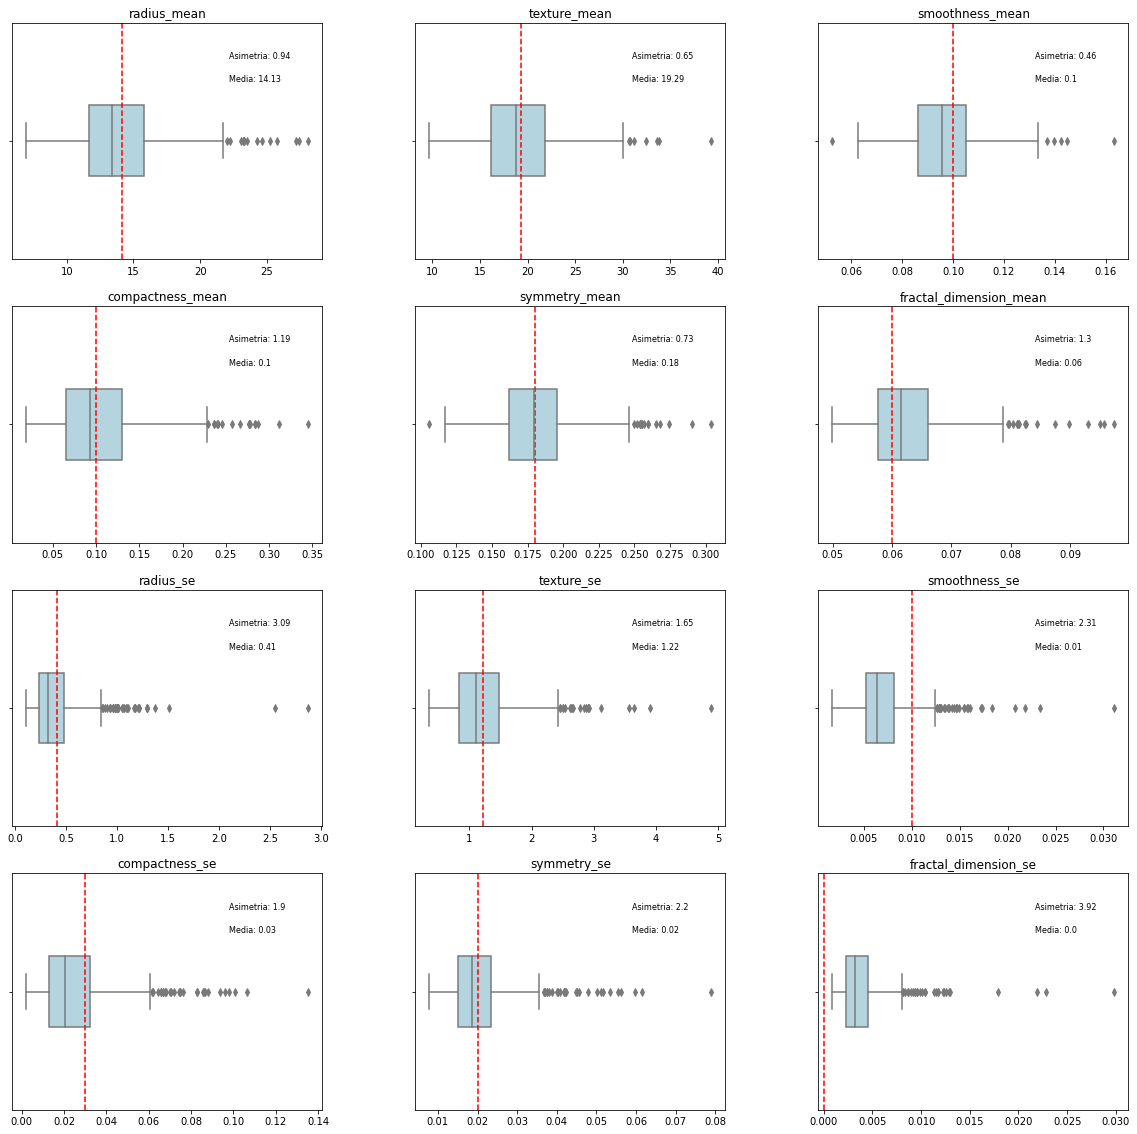

In [30]:
df = data_df
cols_de_interes = columnas

fig, axes = plt.subplots(4,3, figsize=(20,20))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(df[cols_de_interes], axes):
  sns.boxplot(x=df[col], ax=ax, color="lightblue", width=0.3)
  ax.set(title=f'{col}', xlabel=None)
  mean = round(df[col].mean(),2)
  ax.axvline(mean, color='red', linestyle='dashed', label="Media")
  ax.annotate('Media: {}'.format(mean),
              xy=(0.70, 0.75), xycoords='axes fraction',
              fontsize=8, ha='left')
  asim = round(df[col].skew(),2)
  ax.annotate('Asimetria: {}'.format(asim), xy=(0.70, 0.85), 
              xycoords='axes fraction', fontsize=8, ha='left')

In [31]:
# Se define la condición de que estén en el intervalo [0,1]
condicion_rango = (data_df[columnas].min() >= 0) & (data_df[columnas].max() <= 1)

# Se define la condición de que NO estén en el intervalo [0,1]
condicion_rango = ~condicion_rango

# Se localizan las variables
scale_cols = condicion_rango[condicion_rango].index.tolist()
scale_cols

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [32]:
# Se vuelve a leer el dataset
data_df = pd.read_csv('data.csv')

# Se vuelve a cambiar los índices por el 'id'
data_df.set_index('id', inplace=True)

# Se consruye el dataset de las POSIBLES variables predictoras
X = data_df.drop(['diagnosis'], axis=1)

# Se consruye el dataset de la variable de salida
y = data_df['diagnosis']

# Se construyen las muestras de entranamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                train_size = 0.8,
                                                random_state = 1)

In [33]:
# Verificación
print(len(Xtrain) + len(Xtest))
print(len(X))

569
569


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [34]:
vars_eliminar = vars_eliminar_worst + vars_eliminar_altaCorr
vars_eliminar

['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'area_mean',
 'area_se',
 'concavity_mean',
 'concavity_se',
 'concave points_mean',
 'concave points_se']

In [35]:
len(vars_eliminar)

18

In [36]:
preprocessing = make_column_transformer(('drop', vars_eliminar),
                                        remainder = 'passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop', 'drop',
                                 ['radius_worst', 'texture_worst',
                                  'perimeter_worst', 'area_worst',
                                  'smoothness_worst', 'compactness_worst',
                                  'concavity_worst', 'concave points_worst',
                                  'symmetry_worst', 'fractal_dimension_worst',
                                  'perimeter_mean', 'perimeter_se', 'area_mean',
                                  'area_se', 'concavity_mean', 'concavity_se',
                                  'concave points_mean',
                                  'concave points_se'])])

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística. 

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo. 

In [37]:
# Se define el pipeline que incluye el trasformador
# y el modelo de regresión lineal
logr_model = make_pipeline(preprocessing, LogisticRegression())

# En JupyterNotebook muestra una representación gráfica informativa
logr_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst',
                                                   'perimeter_mean',
                                                   'perimeter_se', 'area_mean',
                                                   'area_se', 'concavity_mean',
                                                   'concavity_se',
                                                   'concave points_mean',
                                                   'concave points_se'])])),
                ('logisticregression', LogisticRegression())])

In [38]:
# 
logr_model.fit(Xtrain, ytrain)

ypred = logr_model.predict(Xtest)

In [39]:
cnf_matrix = metrics.confusion_matrix(ytest, ypred,
                                      labels=['B','M'])
pd.DataFrame(cnf_matrix)

,0,1
0,68,4
1,10,32


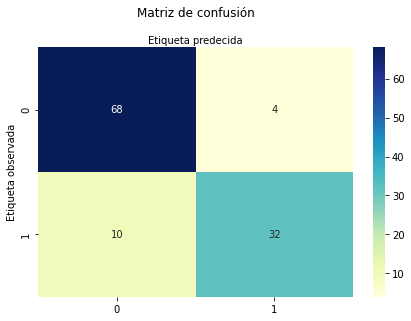

In [40]:
class_names=['B','M'] # nombre de las clases
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Se crea el heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),
            annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta observada')
plt.xlabel('Etiqueta predecida');

In [41]:
print(classification_report(ytest, ypred, target_names=['B','M']))

              precision    recall  f1-score   support

           B       0.87      0.94      0.91        72
           M       0.89      0.76      0.82        42

    accuracy                           0.88       114
   macro avg       0.88      0.85      0.86       114
weighted avg       0.88      0.88      0.87       114



Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'` 

In [42]:
# Se define el preprocesador MinMax
preproceso_numerico = MinMaxScaler()

# Se define el preprocesador/transformador para raíz cuadrada
transformer_cuadratico = FunctionTransformer(np.sqrt)
#("OneHot", preproceso_categorico, predictores_categ),

# Se define el transformador que incluye a ambos preprocesadores
preprocessing2 = ColumnTransformer(
    [("RaizCuadrada", transformer_cuadratico, skew_cols),
     ("EscMinMax", preproceso_numerico, scale_cols)
    ], remainder = 'passthrough')

preprocessing2

ColumnTransformer(remainder='passthrough',
                  transformers=[('RaizCuadrada',
                                 FunctionTransformer(func=<ufunc 'sqrt'>),
                                 ['compactness_mean', 'fractal_dimension_mean',
                                  'radius_se', 'texture_se', 'smoothness_se',
                                  'compactness_se', 'symmetry_se',
                                  'fractal_dimension_se']),
                                ('EscMinMax', MinMaxScaler(),
                                 ['radius_mean', 'texture_mean', 'radius_se',
                                  'texture_se'])])

In [43]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [44]:
preprocessing_compuesto = FeatureUnion([
    ('seleccion_variables', preprocessing),
    ('transformaciones', preprocessing2)])

preprocessing_compuesto

FeatureUnion(transformer_list=[('seleccion_variables',
                                ColumnTransformer(remainder='passthrough',
                                                  transformers=[('drop', 'drop',
                                                                 ['radius_worst',
                                                                  'texture_worst',
                                                                  'perimeter_worst',
                                                                  'area_worst',
                                                                  'smoothness_worst',
                                                                  'compactness_worst',
                                                                  'concavity_worst',
                                                                  'concave '
                                                                  'points_worst',
                                                                  'symmetry_worst',
                                                                  'fractal_dimension_worst',
                                                                  'perimeter_mean',
                                                                  'perimeter_se',
                                                                  'area_...
                               ('transformaciones',
                                ColumnTransformer(remainder='passthrough',
                                                  transformers=[('RaizCuadrada',
                                                                 FunctionTransformer(func=<ufunc 'sqrt'>),
                                                                 ['compactness_mean',
                                                                  'fractal_dimension_mean',
                                                                  'radius_se',
                                                                  'texture_se',
                                                                  'smoothness_se',
                                                                  'compactness_se',
                                                                  'symmetry_se',
                                                                  'fractal_dimension_se']),
                                                                ('EscMinMax',
                                                                 MinMaxScaler(),
                                                                 ['radius_mean',
                                                                  'texture_mean',
                                                                  'radius_se',
                                                                  'texture_se'])]))])

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [45]:
# Se define el pipeline que incluye el trasformador
# y el modelo de regresión lineal
logr_model2 = make_pipeline(preprocessing_compuesto,
                            LogisticRegression())

# En JupyterNotebook muestra una representación gráfica informativa
logr_model2

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('seleccion_variables',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('drop',
                                                                                  'drop',
                                                                                  ['radius_worst',
                                                                                   'texture_worst',
                                                                                   'perimeter_worst',
                                                                                   'area_worst',
                                                                                   'smoothness_worst',
                                                                                   'compactness_worst',
                                                                                   'concavity_worst',
                                                                                   'concave '
                                                                                   'points_worst',
                                                                                   'symmetry_worst',
                                                                                   'fractal_dimension_worst',
                                                                                   'perim...
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('RaizCuadrada',
                                                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                                                  ['compactness_mean',
                                                                                   'fractal_dimension_mean',
                                                                                   'radius_se',
                                                                                   'texture_se',
                                                                                   'smoothness_se',
                                                                                   'compactness_se',
                                                                                   'symmetry_se',
                                                                                   'fractal_dimension_se']),
                                                                                 ('EscMinMax',
                                                                                  MinMaxScaler(),
                                                                                  ['radius_mean',
                                                                                   'texture_mean',
                                                                                   'radius_se',
                                                                                   'texture_se'])]))])),
                ('logisticregression', LogisticRegression())])

In [46]:
logr_model2.fit(Xtrain, ytrain)

ypred = logr_model2.predict(Xtest)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
cnf_matrix = metrics.confusion_matrix(ytest, ypred,
                                      labels=['B','M'])
pd.DataFrame(cnf_matrix)

,0,1
0,71,1
1,3,39


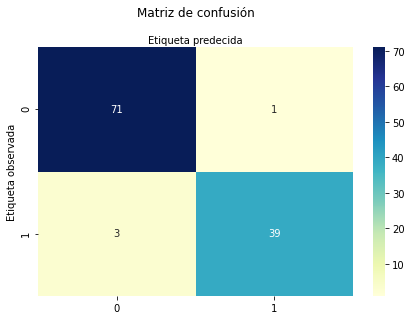

In [48]:
class_names=['B','M'] # nombre de las clases
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Se crea el heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),
            annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta observada')
plt.xlabel('Etiqueta predecida');

In [49]:
print(classification_report(ytest, ypred, target_names=['B','M']))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# **Parte 3**. Modelo con aplicación de PCA 

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [50]:
# Se define el preprocesador escalamiento estándar
preproceso_numerico_sc = StandardScaler()
preproceso_numerico_sc

StandardScaler()

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [51]:
# Se escalan los valores de las variables predictoras
preproceso_numerico_sc = StandardScaler()
X_esc = preproceso_numerico_sc.fit_transform(Xtrain[columnas])

# Se define las características de la transformación PCA
pca = PCA(n_components = len(Xtrain[columnas].columns))
 
# Se aplica PCA a las variables predictoras escaladas
X_pca = pca.fit_transform(X_esc)

varianza_explicada = pca.explained_variance_ratio_

varianza_acumulada = np.cumsum(varianza_explicada)

# Se define el nivel de varianza requerido
nivel_requerido = 0.99

# Se obtiene el número de componentes principales que se requieren
# para superar el nivel de varianza requerido
condicion = varianza_acumulada >= nivel_requerido
indice_cp = next((i for i, j in enumerate(condicion) if j), None)
num_cp = indice_cp + 1
num_cp

11

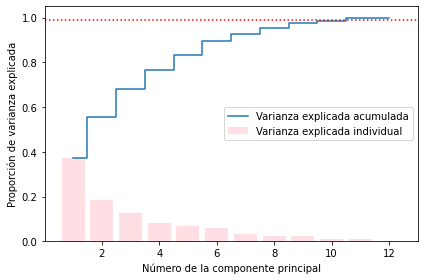

In [52]:
plt.bar(range(1,len(varianza_explicada)+1),
        varianza_explicada, alpha = 0.5, align = 'center', 
        label='Varianza explicada individual', color = "pink")
plt.step(range(1,len(varianza_acumulada)+1), varianza_acumulada, 
         where = 'mid', label = 'Varianza explicada acumulada')
# Se agrega una línea horizontal
plt.axhline(y = nivel_requerido, color = 'r', linestyle = ':')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Número de la componente principal')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [53]:
pca = PCA(n_components = num_cp)

# 
logistic = LogisticRegression()
logr_model3 = Pipeline(steps=[("scaler", preproceso_numerico_sc),
                       ("pca", pca), ("logistic", logistic)])

logr_model3

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=11)),
                ('logistic', LogisticRegression())])

In [54]:
# Se ajusta con los datos de entramiento el pipeline completo
# En JupyterNotebook muestra una representación gráfica informativa
logr_model3.fit(Xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=11)),
                ('logistic', LogisticRegression())])

In [55]:
ypred = logr_model3.predict(Xtest)

cnf_matrix = metrics.confusion_matrix(ytest, ypred,
                                      labels=['B','M'])
pd.DataFrame(cnf_matrix)

,0,1
0,72,0
1,2,40


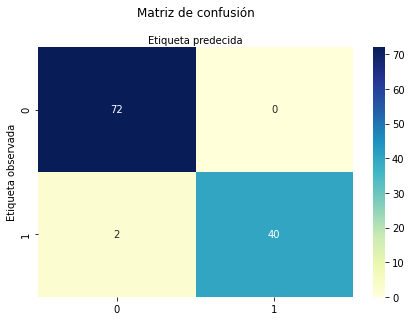

In [56]:
class_names=['B','M'] # nombre de las clases
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Se crea el heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),
            annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta observada')
plt.xlabel('Etiqueta predecida');

In [57]:
print(classification_report(ytest, ypred, target_names=['B','M']))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué? 